<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

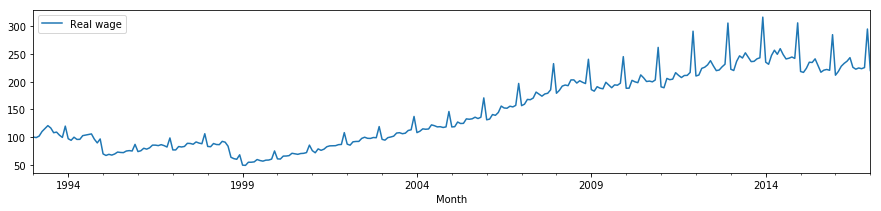

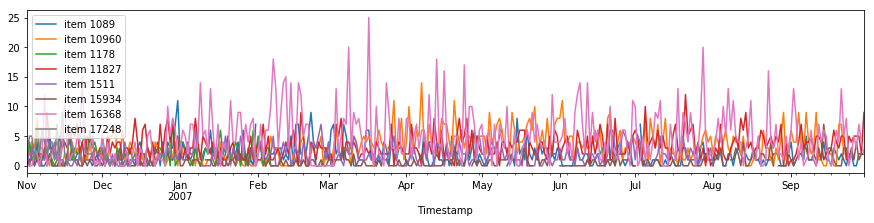

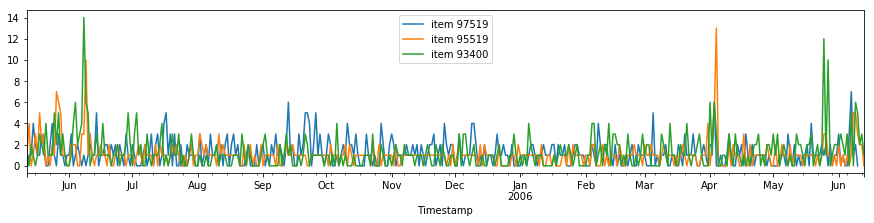

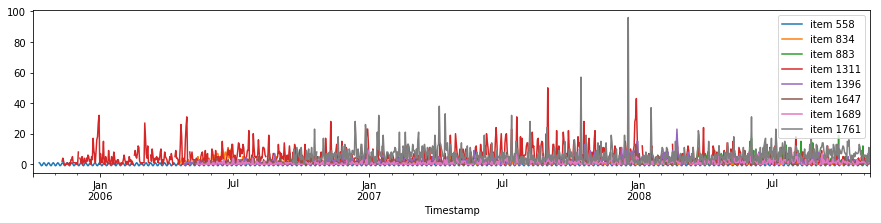

In [13]:
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import math
import pandas.tseries.offsets as ofs
import warnings as w
from matplotlib import gridspec
import plotly.plotly as py

from IPython.display import Image

import statsmodels.api as sm

%matplotlib inline


ts = pd.read_csv('monthly_wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts_dep6=pd.read_csv('TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep36 = pd.read_csv('TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts_dep42 = pd.read_csv('TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
# Put your code below
ts.plot(figsize=(15,3))
ts_dep6[ts_dep6.columns[:8]].plot(figsize=(15,3))
ts_dep36[ts_dep36.columns[:8]].plot(figsize=(15,3))
ts_dep42[ts_dep42.columns[:8]].plot(figsize=(15,3))

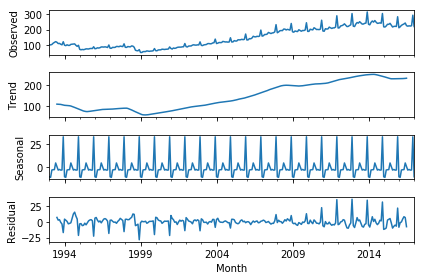

In [2]:
res = sm.tsa.seasonal_decompose(ts)
resplot = res.plot()

In [3]:
ts_dep6

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-06,0.0,3.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,9.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-07,0.0,3.0,1.0,2.0,1.0,0.0,2.0,6.0,3.0,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-08,0.0,2.0,3.0,1.0,1.0,NaN,12.0,4.0,2.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-09,1.0,1.0,1.0,9.0,5.0,0.0,0.0,2.0,2.0,11.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ts_dep6.loc['2006-11-01':'2007-09-30']

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-06,0.0,3.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,9.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-07,0.0,3.0,1.0,2.0,1.0,0.0,2.0,6.0,3.0,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-08,0.0,2.0,3.0,1.0,1.0,NaN,12.0,4.0,2.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-09,1.0,1.0,1.0,9.0,5.0,0.0,0.0,2.0,2.0,11.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

In [5]:
def qualityMSE(x,y):
    return ((x-y)**2).mean() , (x-y)**2

In [6]:
# put your code here
def SimpleExponentialSmoothing(x, h, Params):
    T=len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y   
    return FORECAST
ts_1=ts.loc['1998-09-12':'2015-01-10']
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_1 = pd.DataFrame(index = ts_1.index.append(rng), columns = ts_1.columns)

ALPHA = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
for alpha in ALPHA:
    # ES params
    Params ={'alpha':alpha}
    # forecast
    for cntr in ts_1.columns:
        x = ts_1[cntr]
        frc_ts_1[cntr] = SimpleExponentialSmoothing(x, h, Params)
    Quality, _ = qualityMSE(ts_1, frc_ts_1)
    print(alpha, '-->', Quality.min())

0.1 --> 336.901523957
0.15 --> 283.300262918
0.2 --> 269.421331298
0.25 --> 268.074957699
0.3 --> 272.060711521
0.35 --> 278.810774435
0.4 --> 287.233491897
0.45 --> 296.81022291
0.5 --> 307.279723531
0.55 --> 318.512362372
0.6 --> 330.454963793
0.65 --> 343.104363013
0.7 --> 356.493316618
0.75 --> 370.682095831
0.8 --> 385.753115062
0.85 --> 401.807689409
0.9 --> 418.964761545
0.95 --> 437.361764283
0.99 --> 453.078274783


1) The optimal value for alpha is near to 0.25, which is close to 0. 

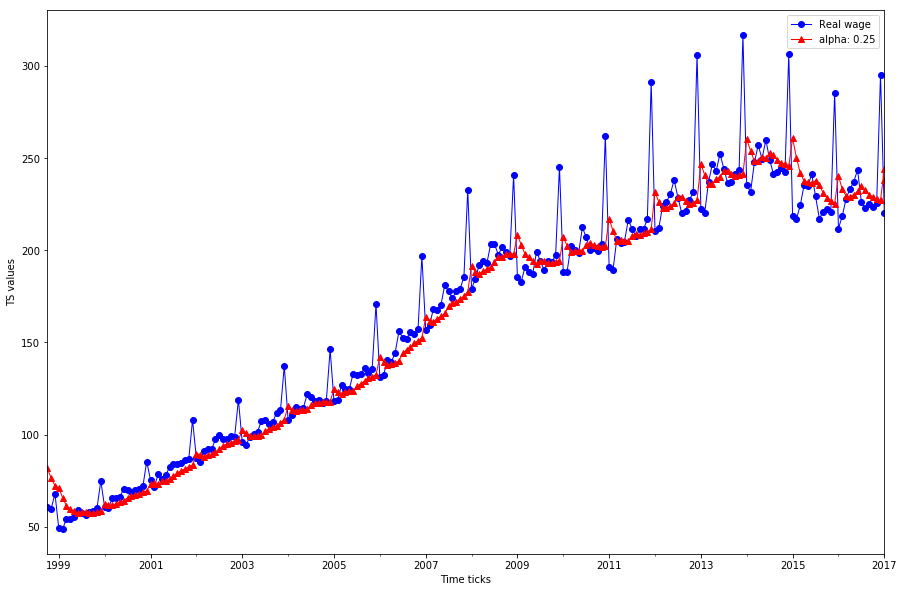

In [7]:
# 2)
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
ts.loc['1998-09-12':'2017-01-10'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params ={'alpha':0.25}
# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09-12':'2017-01-10'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.25))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

2) Since our dta hes trend a sesonality, in my opinion in this case SES is not a good approach.

In [8]:
# 3)
ts_2=ts[ts.columns[ts_num]].loc['2016-02-12':'2017-01-10']
frc_ts_2=frc_ts[frc_ts.columns[ts_num]].loc['2016-02-12':'2017-01-10']
Quality, _ = qualityMSE(ts_2, frc_ts_2)
print(Quality)

514.9212721904566


In [9]:
ts_year=ts.resample("12M").mean()

In [10]:
#4)
h = 1
start = ts_year.index[-1]+timedelta(1)
end = ts_year.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_years = pd.DataFrame(index = ts_year.index.append(rng), columns = ts_year.columns)

ALPHA = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 1]
for alpha in ALPHA:
    # ES params
    Params ={'alpha':alpha}
    # forecast
    for cntr in ts_year.columns:
        x = ts_year[cntr]
        frc_ts_years[cntr] = SimpleExponentialSmoothing(x, h, Params)
    Quality, _ = qualityMSE(ts_year, frc_ts_years)
    print(alpha, '-->', Quality.min())

0.1 --> 3035.38091781
0.15 --> 2143.04770926
0.2 --> 1567.93031572
0.25 --> 1189.52909057
0.3 --> 933.149035794
0.35 --> 754.020411573
0.4 --> 625.194913842
0.45 --> 530.100935304
0.5 --> 458.259038238
0.55 --> 402.84748173
0.6 --> 359.302788395
0.65 --> 324.496678782
0.7 --> 296.238554944
0.75 --> 272.966125743
0.8 --> 253.547682172
0.85 --> 237.152486749
0.9 --> 223.163887598
0.95 --> 211.11997874
0.99 --> 202.647964558
1 --> 200.672506134


4.1) The optional value for alpha is 1. 

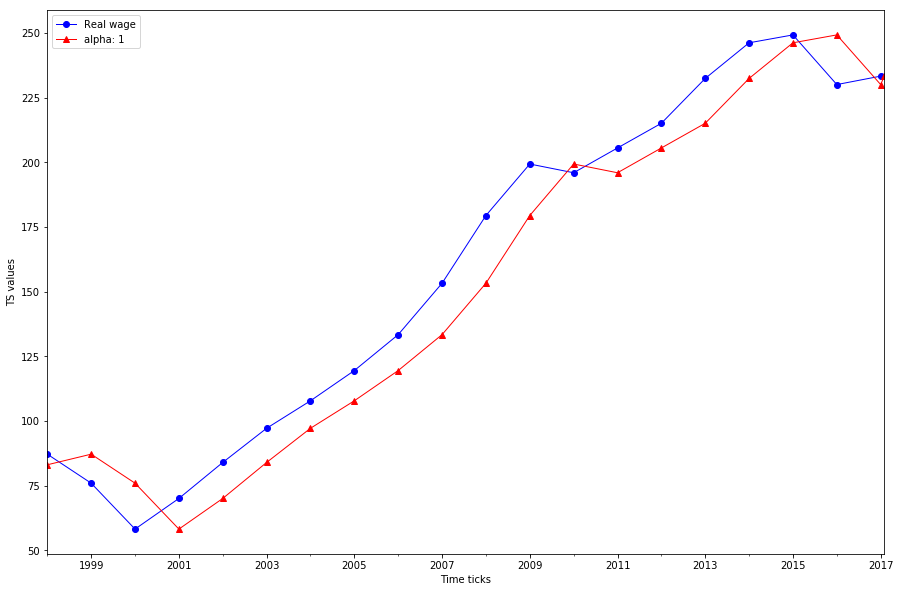

In [11]:
# 4.2)
ts_year.loc['1998':'2017'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params ={'alpha':1}
# forecast
for cntr in ts_year.columns:
    x = ts_year[cntr]
    frc_ts_years[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts_years[frc_ts_years.columns[ts_num]].loc['1998':'2017'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(1))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

In [12]:
# Start with this code


###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)## put forecast of the model here
    
    l=0 # initialize ts level 
    s=[np.NaN]*p # initalize seasonality values (it must be vector of lenth p)
    s=np.array(s)
    s[0]=x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p-1]# initialize 
            s_saved=s[cntr%p]
            s[cntr%p] = delta*(x[cntr]-l)+(1-delta)*s[cntr%p]# recurrent smoothing of seasonality
            l = alpha*(x[cntr]-s_saved)+(1-alpha)*l# recurrent smoothing of level 
        FORECAST[cntr+h] = l + s[(cntr+h % p)%p]
    return FORECAST

In [13]:
# Put your code here

# Example: run forecast:
h = 1
rng = pd.date_range(ts_1.index[-1]+timedelta(1), ts_1.index[-1]+timedelta(h))

w_frc_ts_1 = pd.DataFrame(index = ts_1.index.append(rng), columns = ts_1.columns)
a=[]
ALPHAS = np.arange(0,101,5)/100
for cntr in ts_1.columns:
    for alpha in ALPHAS:
        for delta in ALPHAS:
            Params={'alpha':alpha, 'delta': delta, 'seasonality_period':12}
            w_frc_ts_1[cntr] = WintersExponentialSmoothing(ts_1[cntr], h, Params)
            Quality, _ = qualityMSE(ts_1, w_frc_ts_1)
            a.append(['alpha=', alpha, 'delta=', delta, 'loss=', Quality.min()])

a=np.array(a)
print(a[np.argmin(a[:,5])])


['alpha=' '0.1' 'delta=' '0.4' 'loss=' '100.062687066']


2) So the optimal value for alpha is near to 0.1 and optimal value for gamma is near to 0.. 

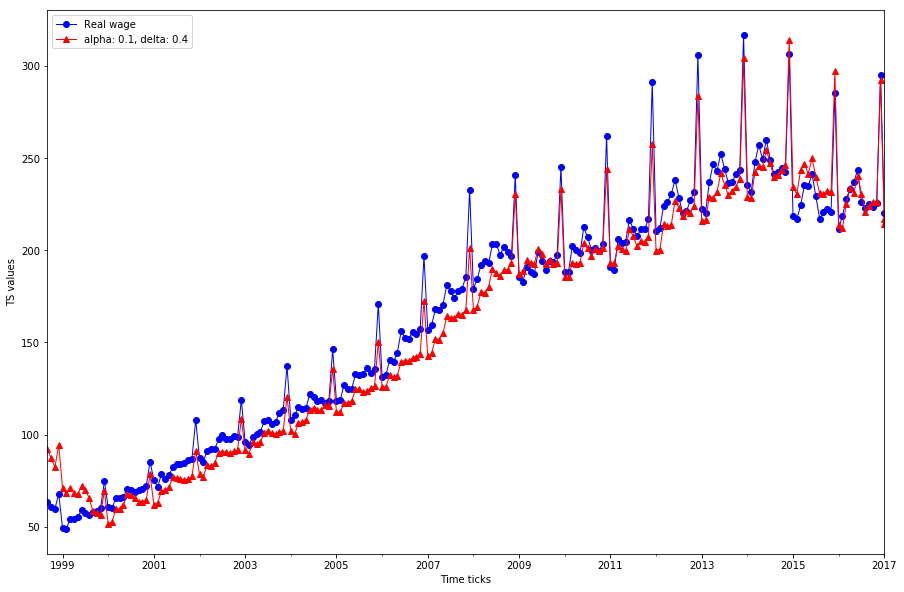

In [15]:
# 2)
ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params ={'alpha':0.1, 'delta':0.4, 'seasonality_period':12}
# forecast
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts_1.columns:
    x = ts[cntr]
    w_frc_ts[cntr] = WintersExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    w_frc_ts[w_frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: 0.1, delta: 0.4')
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

In [16]:
# 3)
for cntr in ts.columns:
    Params={'alpha':0.1, 'delta': 0.4, 'seasonality_period':12}
    w_frc_ts[cntr] = WintersExponentialSmoothing(ts[cntr], h, Params)
ts_num=0            
ts_2=ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
w_frc_ts_2=w_frc_ts[w_frc_ts.columns[ts_num]].loc['2016-02':'2017-01']
Quality, _ = qualityMSE(ts_2, w_frc_ts_2)
print(Quality)

14.439706320009593


So accuracy of the forecast of TS in [02.2016, 01.2017] is approximately 14.4 which is less than 514, which is the accuracy of SES in [02.2016, 01.2017].

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [17]:
# Put your code here
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)## put forecast of the model here
    b=0
    l=0 # initialize ts level 
    s=[np.NaN]*p # initalize seasonality values (it must be vector of lenth p)
    s=np.array(s)
    s[0]=x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p-1]# initialize 
            if math.isnan(b):
                b=x[cntr]
            l_saved=l
            l = alpha*(x[cntr]-s[cntr%p])+(1-alpha)*(l+b)
            s[cntr%p] = gamma*(x[cntr]-l)+(1-gamma)*s[cntr%p]# recurrent smoothing of seasonality
            b = beta*(l-l_saved)+(1-beta)*b
        FORECAST[cntr+h] = l + b*h + s[(cntr+h % p)%p]
    return FORECAST

In [18]:
h = 1
rng = pd.date_range(ts_1.index[-1]+timedelta(1), ts_1.index[-1]+timedelta(h))

th_frc_ts_1 = pd.DataFrame(index = ts_1.index.append(rng), columns = ts_1.columns)
a=[]
constants = np.arange(0,101,5)/100
for cntr in ts_1.columns:
    for alpha in constants:
        for beta in constants:
            for gamma in constants:
                Params={'alpha':alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period':12}
                th_frc_ts_1[cntr] = TheilWageExponentialSmoothing(ts_1[cntr], h, Params)
                Quality, _ = qualityMSE(ts_1, th_frc_ts_1)
                a.append(['alpha=', alpha, 'beta=', beta, 'gamma', gamma, 'loss=', Quality.min()])

a=np.array(a)
print(a[np.argmin(a[:,7])])


['alpha=' '0.75' 'beta=' '0.85' 'gamma' '0.65' 'loss=' '100.125895529']


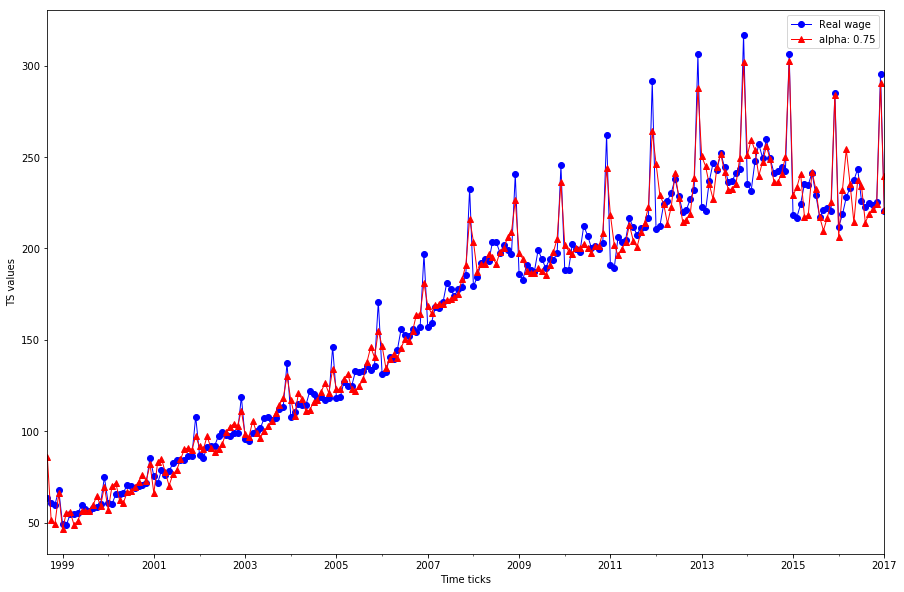

In [19]:
# 2)
ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params ={'alpha':0.75, 'beta':0.85, 'gamma': 0.65, 'seasonality_period':12}
# forecast
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))
th_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts.columns:
    x = ts[cntr]
    th_frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    th_frc_ts[th_frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.75))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

In [20]:
# 3)
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

th_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts.columns:
    Params={'alpha':0.75, 'beta': 0.85, 'gamma': 0.65, 'seasonality_period':12}
    th_frc_ts[cntr] = TheilWageExponentialSmoothing(ts[cntr], h, Params)
            
ts_2=ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
th_frc_ts_2=th_frc_ts[th_frc_ts.columns[ts_num]].loc['2016-02':'2017-01']
Quality, _ = qualityMSE(ts_2, th_frc_ts_2)
print(Quality)

136.46676113136053


<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

Let's realize Winters model with linear trend and multiplicative seasonality.

In [21]:
# Put your code here# Start with this code


###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WinterMultExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)## put forecast of the model here
    b=0
    l=0 # initialize ts level 
    s=[np.NaN]*p # initalize seasonality values (it must be vector of lenth p)
    s=np.array(s)
    s[0]=x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= s[cntr % p-1]# initialize 
            if math.isnan(b):
                b=x[cntr]
            l_saved=l
            l = alpha*(x[cntr]/s[cntr%p])+(1-alpha)*(l+b)
            s[cntr%p] = gamma*(x[cntr]/l)+(1-gamma)*s[cntr%p]# recurrent smoothing of seasonality
            b = beta*(l-l_saved)+(1-beta)*b
        FORECAST[cntr+h] = (l + b*h)*s[(cntr+h % p)%p]
    return FORECAST

In [22]:
h = 1
rng = pd.date_range(ts_1.index[-1]+timedelta(1), ts_1.index[-1]+timedelta(h))

wm_frc_ts_1 = pd.DataFrame(index = ts_1.index.append(rng), columns = ts_1.columns)
a=[]
constants = np.arange(0,101,5)/100
for cntr in ts_1.columns:
    for alpha in constants:
        for beta in constants:
            for gamma in constants:
                Params={'alpha':alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period':12}
                wm_frc_ts_1[cntr] = WinterMultExponentialSmoothing(ts_1[cntr], h, Params)
                Quality, _ = qualityMSE(ts_1, wm_frc_ts_1)
                a.append(['alpha=', alpha, 'beta=', beta, 'gamma', gamma, 'loss=', Quality.min()])

a=np.array(a)
print(a[np.argmin(a[:,7])])


C:\Users\Vazgen\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Vazgen\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Vazgen\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning:

invalid value encountered in double_scalars



['alpha=' '0.45' 'beta=' '0.05' 'gamma' '0.1' 'loss=' '100.049458222']


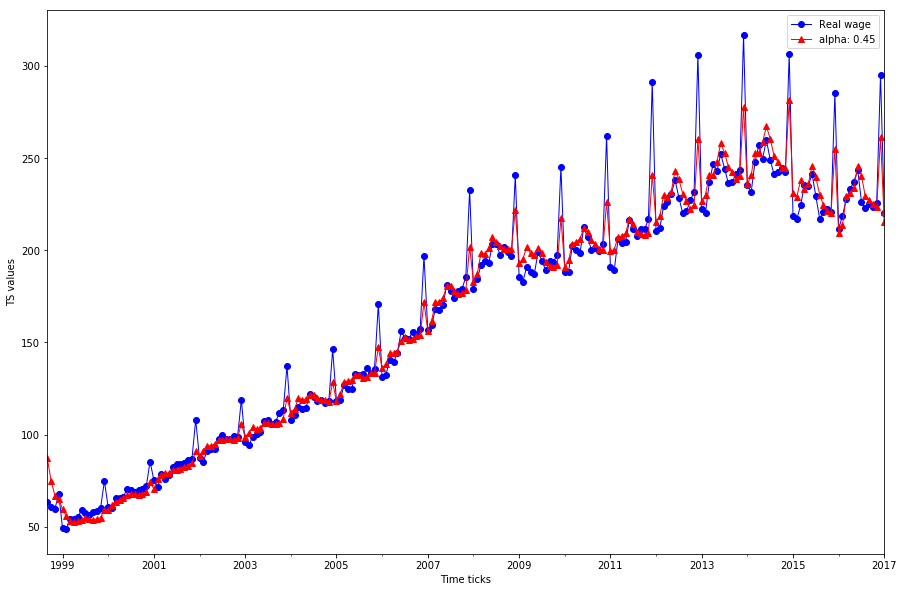

In [23]:
# 2)
ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params ={'alpha':0.45, 'beta':0.05, 'gamma': 0.1, 'seasonality_period':12}
# forecast
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))
wm_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts.columns:
    x = ts[cntr]
    wm_frc_ts[cntr] = WinterMultExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    wm_frc_ts[wm_frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.45))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

In [24]:
# 4)
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

wm_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts.columns:
    Params={'alpha':0.75, 'beta': 0.85, 'gamma': 0.65, 'seasonality_period':12}
    wm_frc_ts[cntr] = WinterMultExponentialSmoothing(ts[cntr], h, Params)
            
ts_2=ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
wm_frc_ts_2=wm_frc_ts[wm_frc_ts.columns[ts_num]].loc['2016-02':'2017-01']
Quality, _ = qualityMSE(ts_2, wm_frc_ts_2)
print(Quality)

862.2316388675964


So the best model is Winter's aditive model.

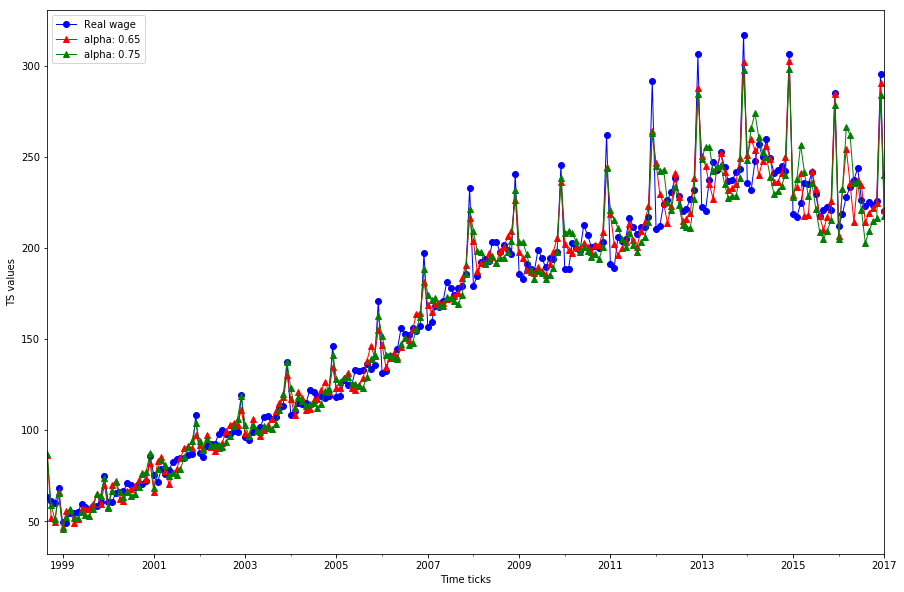

In [25]:
#5)
ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params={'alpha':0.75, 'beta': 0.85, 'gamma': 0.65, 'seasonality_period':12}
Params1 ={'alpha':0.65, 'beta':0.75, 'gamma': 0.55, 'seasonality_period':12}
# forecast
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))
th_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
th_frc_ts_0 = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts.columns:
    x = ts[cntr]
    th_frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    th_frc_ts[th_frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.65))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()    
    y = ts[cntr]
    th_frc_ts_0[cntr] = TheilWageExponentialSmoothing(y, h, Params1)
    th_frc_ts_0[th_frc_ts_0.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='g-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.75))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

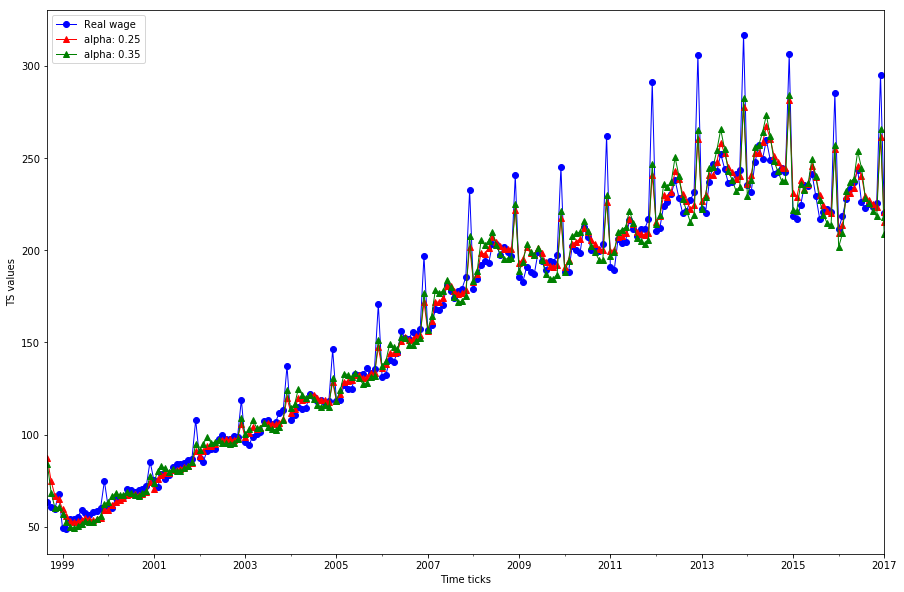

In [72]:
# 2)
ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')
# ES params
Params ={'alpha':0.45, 'beta':0.05, 'gamma': 0.1, 'seasonality_period':12}
Params1 ={'alpha':0.55, 'beta':0.15, 'gamma': 0.2, 'seasonality_period':12}
# forecast
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))
wm_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
wm_frc_ts_0 = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
for cntr in ts.columns:
    x = ts[cntr]
    wm_frc_ts[cntr] = WinterMultExponentialSmoothing(x, h, Params) 
    ts_num=0
    wm_frc_ts[wm_frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.25))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    y = ts[cntr]
    wm_frc_ts_0[cntr] = WinterMultExponentialSmoothing(y, h, Params1) 
    ts_num=0
    wm_frc_ts_0[wm_frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='g-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.35))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

5) So my answer is that it is true that multiplicative model are more unstable than additive.